In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
# pip install kagglehub pandas  # (run this once in your env)

import os
import pandas as pd
import kagglehub

# Download latest version of the dataset to a local cache
path = kagglehub.dataset_download("robervalt/sunspots")
print("Path to dataset files:", path)

# Load the CSV into a DataFrame
file_name = "sunspots.csv"
file_path = os.path.join(path, file_name)

data = pd.read_csv(file_path)

# Prepare data for time series forecasting
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.drop('Unnamed: 0', axis=1)  # remove unnecessary index column

print(data.head())
print(data.info())

Path to dataset files: /Users/spartan/.cache/kagglehub/datasets/robervalt/sunspots/versions/3
            Monthly Mean Total Sunspot Number
Date                                         
1749-01-31                               96.7
1749-02-28                              104.3
1749-03-31                              116.7
1749-04-30                               92.8
1749-05-31                              141.7
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3265 entries, 1749-01-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1)
memory usage: 51.0 KB
None


<Axes: xlabel='Date'>

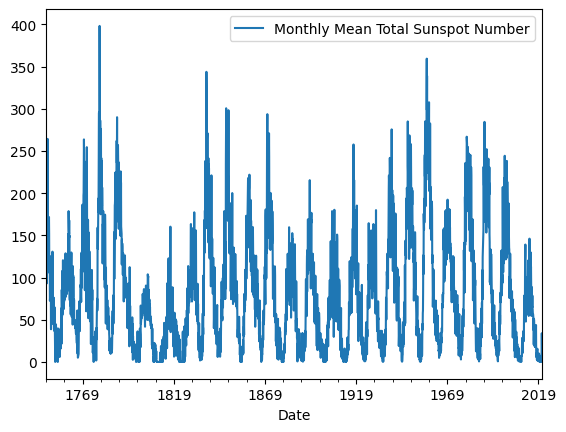

In [3]:
# plot the dataset
data.plot()

In [4]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Monthly Mean Total Sunspot Number
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3265, 1)"
5,Transformed data shape,"(3265, 1)"
6,Transformed train set shape,"(3262, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [5]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [6]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [7]:
# init setup on exp
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Monthly Mean Total Sunspot Number
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3265, 1)"
5,Transformed data shape,"(3265, 1)"
6,Transformed train set shape,"(3262, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [8]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,3265.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,81.778775
3,Summary,Statistics,Transformed,Median,,67.2
4,Summary,Statistics,Transformed,Standard Deviation,,67.889277
5,Summary,Statistics,Transformed,Variance,,4608.953866
6,Summary,Statistics,Transformed,Kurtosis,,0.338717
7,Summary,Statistics,Transformed,Skewness,,0.926221
8,Summary,Statistics,Transformed,# Distinct Values,,1599.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",38533.53463


In [9]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.1442,0.1143,3.3128,3.7095,4.8690,0.9373,-0.2098,0.0900
arima,ARIMA,0.1445,0.1169,3.3204,3.7945,4.2531,0.9615,-0.4910,0.0267
theta,Theta Forecaster,0.1532,0.1179,3.5212,3.8263,5.0427,0.9685,-0.2331,1.1500
snaive,Seasonal Naive Forecaster,0.1547,0.1263,3.5556,4.0969,3.0770,1.0503,-0.6531,0.7167
stlf,STLF,0.1572,0.1213,3.6129,3.9346,3.6663,1.0660,-0.3015,1.1233
naive,Naive Forecaster,0.1615,0.1356,3.7111,4.3989,7.6118,0.8943,-1.2122,2.0800
croston,Croston,0.1618,0.1339,3.7187,4.3433,6.7069,0.9362,-0.9015,0.0133
ets,ETS,0.1645,0.1278,3.7802,4.1477,5.0395,1.0132,-0.3866,0.0633
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.1657,0.1424,3.8099,4.6199,8.2651,0.8723,-2.1909,0.3933
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.1888,0.1583,4.3410,5.1358,9.8036,0.8887,-3.4663,0.0867


In [10]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.1442,0.1143,3.3128,3.7095,4.8690,0.9373,-0.2098,0.0933
arima,ARIMA,0.1445,0.1169,3.3204,3.7945,4.2531,0.9615,-0.4910,0.0400
theta,Theta Forecaster,0.1532,0.1179,3.5212,3.8263,5.0427,0.9685,-0.2331,0.0133
snaive,Seasonal Naive Forecaster,0.1547,0.1263,3.5556,4.0969,3.0770,1.0503,-0.6531,0.0333
stlf,STLF,0.1572,0.1213,3.6129,3.9346,3.6663,1.0660,-0.3015,0.0200
naive,Naive Forecaster,0.1615,0.1356,3.7111,4.3989,7.6118,0.8943,-1.2122,0.0467
croston,Croston,0.1618,0.1339,3.7187,4.3433,6.7069,0.9362,-0.9015,0.0100
ets,ETS,0.1645,0.1278,3.7802,4.1477,5.0395,1.0132,-0.3866,0.0633
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.1657,0.1424,3.8099,4.6199,8.2651,0.8723,-2.1909,0.4033
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.1888,0.1583,4.3410,5.1358,9.8036,0.8887,-3.4663,0.0867


ExponentialSmoothing(seasonal='add', sp=2, trend='add')

In [11]:
# plot forecast
plot_model(best, plot = 'forecast')

In [12]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [13]:
# residuals plot
plot_model(best, plot = 'residuals')

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,0.5823,0.5081,13.3621,16.4712,0.5066,0.7414,-1.9215


In [15]:
# show predictions df
holdout_pred.head()

,y_pred
2020-11,8.4314
2020-12,9.3084
2021-01,8.3738


In [16]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

,y_pred
2020-11,8.4314
2020-12,9.3084
2021-01,8.3738
2021-02,9.2508
2021-03,8.3162
2021-04,9.1932
2021-05,8.2586
2021-06,9.1356
2021-07,8.2010
2021-08,9.0780


In [17]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ExponentialSmoothing(seasonal='add',
                                                                                      sp=2,
                                                                                      trend='add'))]))]),
 'my_first_pipeline.pkl')

In [18]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ExponentialSmoothing(seasonal='add',
                                                                                     sp=2,
                                                                                     trend='add'))]))])

In [19]:
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Monthly Mean Total Sunspot Number
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3265, 1)"
5,Transformed data shape,"(3265, 1)"
6,Transformed train set shape,"(3262, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [20]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'all_sps_to_use',
 'approach_type',
 'candidate_sps',
 'data',
 'dataset',
 'dataset_transformed',
 'enforce_exogenous',
 'enforce_pi',
 'exogenous_present',
 'exp_id',
 'exp_name_log',
 'fh',
 'fold_generator',
 'fold_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'index_type',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'model_engines',
 'n_jobs_param',
 'pipeline',
 'primary_sp_to_use',
 'seasonality_present',
 'seed',
 'significant_sps',
 'significant_sps_no_harmonics',
 'strictly_positive',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [21]:
# lets access y_train_transformed
get_config('y_train_transformed')

Date
1749-01     96.7
1749-02    104.3
1749-03    116.7
1749-04     92.8
1749-05    141.7
           ...  
2020-06      5.8
2020-07      6.1
2020-08      7.5
2020-09      0.6
2020-10     14.4
Freq: M, Name: Monthly Mean Total Sunspot Number, Length: 3262, dtype: float64

In [22]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [23]:
# init setup fold_strategy = expanding
s = setup(data, fh = 3, session_id = 123,
          fold_strategy = 'expanding', numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,Monthly Mean Total Sunspot Number
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3265, 1)"
5,Transformed data shape,"(3265, 1)"
6,Transformed train set shape,"(3262, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [24]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.1442,0.1143,3.3128,3.7095,4.8690,0.9373,-0.2098,0.0967
arima,ARIMA,0.1445,0.1169,3.3204,3.7945,4.2531,0.9615,-0.4910,0.0400
theta,Theta Forecaster,0.1532,0.1179,3.5212,3.8263,5.0427,0.9685,-0.2331,0.0200
snaive,Seasonal Naive Forecaster,0.1547,0.1263,3.5556,4.0969,3.0770,1.0503,-0.6531,0.0233
stlf,STLF,0.1572,0.1213,3.6129,3.9346,3.6663,1.0660,-0.3015,0.0200
naive,Naive Forecaster,0.1615,0.1356,3.7111,4.3989,7.6118,0.8943,-1.2122,0.0267
croston,Croston,0.1618,0.1339,3.7187,4.3433,6.7069,0.9362,-0.9015,0.0133
ets,ETS,0.1645,0.1278,3.7802,4.1477,5.0395,1.0132,-0.3866,0.0367
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.1657,0.1424,3.8099,4.6199,8.2651,0.8723,-2.1909,0.3967
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.1888,0.1583,4.3410,5.1358,9.8036,0.8887,-3.4663,0.0967


In [25]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [26]:
compare_ts_models = compare_models(include = ['ets', 'arima', 'theta', 'naive', 'snaive', 'grand_means', 'polytrend'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.1445,0.1169,3.3204,3.7945,4.2531,0.9615,-0.4910,0.0333
theta,Theta Forecaster,0.1532,0.1179,3.5212,3.8263,5.0427,0.9685,-0.2331,0.0167
snaive,Seasonal Naive Forecaster,0.1547,0.1263,3.5556,4.0969,3.0770,1.0503,-0.6531,0.0167
naive,Naive Forecaster,0.1615,0.1356,3.7111,4.3989,7.6118,0.8943,-1.2122,0.0167
ets,ETS,0.1645,0.1278,3.7802,4.1477,5.0395,1.0132,-0.3866,0.0367
grand_means,Grand Means Forecaster,3.3660,2.3871,77.3633,77.4594,118.0295,1.7962,-805.6603,0.0133
polytrend,Polynomial Trend Forecaster,3.5775,2.5368,82.2242,82.3147,125.1829,1.8065,-910.7147,0.0167


In [27]:
compare_ts_models

ARIMA(seasonal_order=(0, 1, 0, 2))

In [28]:
compare_ts_models_results = pull()
compare_ts_models_results

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.1445,0.1169,3.3204,3.7945,4.2531,0.9615,-0.491,0.0333
theta,Theta Forecaster,0.1532,0.1179,3.5212,3.8263,5.0427,0.9685,-0.2331,0.0167
snaive,Seasonal Naive Forecaster,0.1547,0.1263,3.5556,4.0969,3.077,1.0503,-0.6531,0.0167
naive,Naive Forecaster,0.1615,0.1356,3.7111,4.3989,7.6118,0.8943,-1.2122,0.0167
ets,ETS,0.1645,0.1278,3.7802,4.1477,5.0395,1.0132,-0.3866,0.0367
grand_means,Grand Means Forecaster,3.366,2.3871,77.3633,77.4594,118.0295,1.7962,-805.6603,0.0133
polytrend,Polynomial Trend Forecaster,3.5775,2.5368,82.2242,82.3147,125.1829,1.8065,-910.7147,0.0167


In [29]:
best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.1442,0.1143,3.3128,3.7095,4.8690,0.9373,-0.2098,0.1033
theta,Theta Forecaster,0.1532,0.1179,3.5212,3.8263,5.0427,0.9685,-0.2331,0.0200
stlf,STLF,0.1572,0.1213,3.6129,3.9346,3.6663,1.0660,-0.3015,0.0233
ets,ETS,0.1645,0.1278,3.7802,4.1477,5.0395,1.0132,-0.3866,0.0367
arima,ARIMA,0.1445,0.1169,3.3204,3.7945,4.2531,0.9615,-0.4910,0.0333
snaive,Seasonal Naive Forecaster,0.1547,0.1263,3.5556,4.0969,3.0770,1.0503,-0.6531,0.0200
croston,Croston,0.1618,0.1339,3.7187,4.3433,6.7069,0.9362,-0.9015,0.0167
naive,Naive Forecaster,0.1615,0.1356,3.7111,4.3989,7.6118,0.8943,-1.2122,0.0433
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.1657,0.1424,3.8099,4.6199,8.2651,0.8723,-2.1909,0.2667
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.1941,0.1524,4.4618,4.9462,8.5082,0.9585,-2.6120,0.2867


In [30]:
# list of top 3 models by MAE
best_mae_models_top3

[ExponentialSmoothing(seasonal='add', sp=2, trend='add'),
 ThetaForecaster(deseasonalize=False, sp=2),
 STLForecaster()]

In [31]:
# check stats on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,3265.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,81.778775
3,Summary,Statistics,Transformed,Median,,67.2
4,Summary,Statistics,Transformed,Standard Deviation,,67.889277
5,Summary,Statistics,Transformed,Variance,,4608.953866
6,Summary,Statistics,Transformed,Kurtosis,,0.338717
7,Summary,Statistics,Transformed,Skewness,,0.926221
8,Summary,Statistics,Transformed,# Distinct Values,,1599.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",38533.53463


In [32]:
# check_stats on residuals of best model
check_stats(estimator = best)

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,3262.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,-0.00028
3,Summary,Statistics,Residual,Median,,-0.77755
4,Summary,Statistics,Residual,Standard Deviation,,25.388653
5,Summary,Statistics,Residual,Variance,,644.583707
6,Summary,Statistics,Residual,Kurtosis,,3.26097
7,Summary,Statistics,Residual,Skewness,,0.402896
8,Summary,Statistics,Residual,# Distinct Values,,3257.0
9,White Noise,Ljung-Box,Residual,Test Statictic,"{'alpha': 0.05, 'K': 24}",152.855809


In [33]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [34]:
# train ets with default fold=3
ets = create_model('ets')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-01,0.1006,0.0821,2.3130,2.6666,7.3299,0.9313,-0.5849
1,2020-04,0.1165,0.0839,2.6773,2.7240,4.7256,0.9720,-0.0079
2,2020-07,0.2765,0.2174,6.3504,7.0524,3.0631,1.1365,-0.5670
Mean,NaT,0.1645,0.1278,3.7802,4.1477,5.0395,1.0132,-0.3866
SD,NaT,0.0795,0.0634,1.8234,2.0541,1.7560,0.0887,0.2679


In [35]:
ets_results = pull()
print(type(ets_results))
ets_results

<class 'pandas.core.frame.DataFrame'>


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-01,0.1006,0.0821,2.3130,2.6666,7.3299,0.9313,-0.5849
1,2020-04,0.1165,0.0839,2.6773,2.7240,4.7256,0.9720,-0.0079
2,2020-07,0.2765,0.2174,6.3504,7.0524,3.0631,1.1365,-0.5670
Mean,NaT,0.1645,0.1278,3.7802,4.1477,5.0395,1.0132,-0.3866
SD,NaT,0.0795,0.0634,1.8234,2.0541,1.7560,0.0887,0.2679


In [36]:
# train theta model with fold=5
theta = create_model('theta', fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-07,0.0936,0.0671,2.1576,2.1796,4.0924,1.2603,-48.7168
1,2019-10,0.0918,0.0958,2.1123,3.1111,0.6681,0.8607,-0.5673
2,2020-01,0.1052,0.0792,2.4192,2.5719,6.5263,0.9927,-0.4743
3,2020-04,0.1185,0.0850,2.7243,2.7596,5.8093,0.9360,-0.0344
4,2020-07,0.2360,0.1895,5.4202,6.1472,2.7924,0.9767,-0.1906
Mean,NaT,0.1290,0.1033,2.9667,3.3539,3.9777,1.0053,-9.9967
SD,NaT,0.0543,0.0441,1.2460,1.4286,2.1082,0.1354,19.3610


In [37]:
# train theta with specific model parameters
create_model('theta', deseasonalize = False, fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-07,0.0936,0.0671,2.1576,2.1796,4.0924,1.2603,-48.7168
1,2019-10,0.0918,0.0958,2.1123,3.1111,0.6681,0.8607,-0.5673
2,2020-01,0.1052,0.0792,2.4192,2.5719,6.5263,0.9927,-0.4743
3,2020-04,0.1185,0.0850,2.7243,2.7596,5.8093,0.9360,-0.0344
4,2020-07,0.2360,0.1895,5.4202,6.1472,2.7924,0.9767,-0.1906
Mean,NaT,0.1290,0.1033,2.9667,3.3539,3.9777,1.0053,-9.9967
SD,NaT,0.0543,0.0441,1.2460,1.4286,2.1082,0.1354,19.3610


ThetaForecaster(deseasonalize=False, sp=2)

In [38]:
# train a dt model with default params
dt = create_model('dt_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-01,0.7217,0.5624,16.6008,18.2578,18.2849,1.6714,-73.2976
1,2020-04,0.2261,0.1640,5.1962,5.3202,11.8445,1.4099,-2.8446
2,2020-07,0.2665,0.2339,6.1195,7.5852,2.1093,1.0930,-0.8127
Mean,NaT,0.4048,0.3201,9.3055,10.3877,10.7462,1.3915,-25.6516
SD,NaT,0.2247,0.1737,5.1723,5.6413,6.6492,0.2365,33.7010


In [39]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-01,0.1214,0.0977,2.7922,3.1726,8.3432,0.9934,-1.2433
1,2020-04,0.0923,0.0709,2.1208,2.2991,5.7945,0.7650,0.2820
2,2020-07,0.2386,0.1885,5.4788,6.1128,4.4524,0.8804,-0.1773
Mean,NaT,0.1507,0.1190,3.4639,3.8615,6.1967,0.8796,-0.3795
SD,NaT,0.0632,0.0503,1.4508,1.6314,1.6137,0.0932,0.6389


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished


In [40]:
dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(random_state=123), sp=2,
                    window_length=2)

In [41]:
# define tuning grid
dt_grid = {'regressor__max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-01,0.3129,0.2388,7.1973,7.7508,12.4648,1.3534,-12.3895
1,2020-04,0.1153,0.0998,2.6491,3.2374,8.8056,0.7561,-0.4236
2,2020-07,0.1695,0.1518,3.8927,4.9233,4.3021,0.7214,0.2363
Mean,NaT,0.1992,0.1634,4.5797,5.3038,8.5242,0.9436,-4.1923
SD,NaT,0.0834,0.0573,1.9193,1.8621,3.3384,0.2901,5.8026


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.3s finished


In [42]:
# see tuned_dt params
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(max_depth=10, random_state=123),
                    sp=2, window_length=2)

In [43]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-01,0.1214,0.0977,2.7922,3.1726,8.3432,0.9934,-1.2433
1,2020-04,0.0923,0.0709,2.1208,2.2991,5.7945,0.7650,0.2820
2,2020-07,0.2386,0.1885,5.4788,6.1128,4.4524,0.8804,-0.1773
Mean,NaT,0.1507,0.1190,3.4639,3.8615,6.1967,0.8796,-0.3795
SD,NaT,0.0632,0.0503,1.4508,1.6314,1.6137,0.0932,0.6389


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished


In [44]:
# model object
tuned_dt

BaseCdsDtForecaster(degree=5,
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt',
                      min_impurity_decrease=1.5918442604814286e-05,
                      min_samples_leaf=3, min_samples_split=9,
                      random_state=123),
                    sp=4, window_length=2)

In [45]:
# tuner object
tuner

In [46]:
# top 3 models based on mae
best_mae_models_top3

[ExponentialSmoothing(seasonal='add', sp=2, trend='add'),
 ThetaForecaster(deseasonalize=False, sp=2),
 STLForecaster()]

In [47]:
# blend top 3 models
blend_models(best_mae_models_top3)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-01,0.1027,0.0745,2.3634,2.4170,5.7113,1.0156,-0.3021
1,2020-04,0.1231,0.0874,2.8292,2.8362,5.2882,0.9884,-0.0926
2,2020-07,0.2288,0.1859,5.2543,6.0282,2.5785,0.9594,-0.1449
Mean,NaT,0.1515,0.1159,3.4823,3.7605,4.5260,0.9878,-0.1799
SD,NaT,0.0553,0.0497,1.2673,1.6126,1.3878,0.0230,0.0890


EnsembleForecaster(forecasters=[('Exponential Smoothing',
                                 ExponentialSmoothing(seasonal='add', sp=2,
                                                      trend='add')),
                                ('Theta Forecaster',
                                 ThetaForecaster(deseasonalize=False, sp=2)),
                                ('STLF', STLForecaster())],
                   n_jobs=-1)

In [48]:
# plot forecast
plot_model(best, plot = 'forecast')

In [49]:
# plot acf
# for certain plots you don't need a trained model
plot_model(plot = 'acf')

In [50]:
# plot diagnostics
# for certain plots you don't need a trained model
plot_model(plot = 'diagnostics')

In [51]:
final_best = finalize_model(best)

In [52]:
final_best

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                ExponentialSmoothing(seasonal='add',
                                                                                     sp=2,
                                                                                     trend='add'))]))])

In [53]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('numerical_imputer',
                                                                                             Imputer(random_state=123))])),
                                                                ('model',
                                                                 ExponentialSmoothing(seasonal='add',
                                                                                      sp=2,
                                                                                      trend='add'))]))]),
 'my_first_model.pkl')

In [54]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                ExponentialSmoothing(seasonal='add',
                                                                                     sp=2,
                                                                                     trend='add'))]))])

In [55]:
# save experiment
save_experiment('my_experiment')

In [56]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,session_id,123
1,Target,Monthly Mean Total Sunspot Number
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3265, 1)"
5,Transformed data shape,"(3265, 1)"
6,Transformed train set shape,"(3262, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter
